<h1 align="center" style="padding:25px">Image Recognition — Capstone Project</h1>

<h2 align="center" style="padding:25px">II. Convolutional Neural Networks Models<a class="tocSkip"></a></h2>

<div style="text-align: left; padding:25px"><b>By Raul A. Morales Delgado</b></div>

## Setting up packages and modules

In [413]:
# Importing modules for file loading and operations:
from os import listdir, getpid
from os.path import isdir, join, isfile
import subprocess

# Importing general packages and modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

%matplotlib inline

# Importing Keras modules:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import Model
from keras.models import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
# For transfer learning:
from keras.applications import MobileNet, vgg16
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input as pi_mobilenet
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.preprocessing.image import ImageDataGenerator


# Setting seaborn document-wide context and style:
sns.set_context('notebook', font_scale = 1.2)
sns.set_style("white")

# Setting font for plots: Proxima Nova Regular
import matplotlib.font_manager as fm
fm._rebuild()
# Setting the font family:
plt.rcParams['font.family'] = 'sans-serif'
# Setting the desired font:
plt.rcParams['font.sans-serif'] = 'PLT Proxima Nova Reg'

# Importing garbage collector:
import gc
gc.collect();

In [2]:
# Verifying the working environment:
!which python

/home/ubuntu/anaconda3/envs/tensorflow_p36/bin/python


In [3]:
# Caffeinate for this notebook:
try:
    try:
        _caf.kill()
    except:
        pass
    my_pid = getpid()
    _caf = subprocess.Popen(['caffeinate', '-is', '-w', str(my_pid)])
except:
    print('Failing to run Caffeinate.')
else:
    print('Process ID: {}. Caffeinate ON.'.format(my_pid))

Failing to run Caffeinate.


## Loading the data

In this section, the images that were previously imported and transformed into 2D arrays will be imported into this notebook.

In [4]:
def data_soul_generator(path_to_save_in, name_of_file, data = None, load = True, overwrite = False):
    '''
    Function: data_soul_generator(path_to_save_in, name_of_file, data = None, load = True, overwrite = False)
    
    This function imports data from a chosen 'csv' file. If file does not exist and 'data' is provided, then 
    the function will proceed to save the data as a 'csv' file in the path indicated. 
    
    This function will only store data as either numpy dtype uint8, for integers, or <U9, for strings.
    
    '''
    import time
    
    try:
        # Checking if the file exists (yields True or False):
        assert (isfile(join(path_to_save_in, name_of_file)))
    except:
        # If file does not exist, the data will be transformed into an array and saved at the specified path:
        print('File not found.\n')
        if data is None:
            return None
        else:
            time.sleep(1)
            answer = input('Would you like to save data into file? [yes/no]\n')
            if answer == 'yes':
                try:
                    #Checking if it a file path or an array:
                    assert (type(data) is np.ndarray)
                    assert (np.issubdtype(data.dtype, np.uint8))
                except:
                    print('Array (dtype: string) detected. Saving array at "{}"'.format(join(path_to_save_in, 
                                                                                             name_of_file)))
                    np.savetxt('{}'.format(join(path_to_save_in, name_of_file)), 
                               data,
                               delimiter = ',',
                               encoding = 'utf-8',
                               fmt = '%s')
                    return data
                else:
                    ('Array (dtype: numeric) detected. Saving array at "{}"'.format(join(path_to_save_in, 
                                                                                         name_of_file)))
                    np.savetxt('{}'.format(join(path_to_save_in, name_of_file)), 
                               data,
                               delimiter = ',',
                               encoding = 'utf-8',
                               fmt = '%u')
                    return data
            else:
                print('No files were loaded nor imported.')
                return None
    else:
        print('File exists at "{}".\n'.format(join(path_to_save_in, name_of_file)))
        time.sleep(1)
        # Conditional to load file into array or not:
        if (load == True) & (overwrite == False):
            print('Loading file into an array...', end = '\r', flush = True)
            try:
                loaded_array = np.loadtxt(join(path_to_save_in, name_of_file), dtype = 'uint8', delimiter = ',')
            except:
                loaded_array = np.loadtxt(join(path_to_save_in, name_of_file), dtype = '<U9', delimiter = ',')
            finally:
                print('File loaded into array successfully!')
                print('The shape of the loaded file into array is: {}.'.format(loaded_array.shape))
                return loaded_array

        # Overwriting the existing file by importing again the images into an array and saving them:
        elif (load == True) & (overwrite == True):
            answer = input('Are you sure to overwrite "{}"? [yes/no]\n'.format(join(path_to_save_in, 
                                                                                      name_of_file)))
            if answer == 'yes':
                print('Starting to overwrite file into an array...')
                try:
                    #Checking if it a file path or an array:
                    assert (type(data) is np.ndarray)
                except:
                    print('Array (dtype: string) detected. Saving array at "{}"'.format(join(path_to_save_in, 
                                                                                             name_of_file)))
                    np.savetxt('{}'.format(join(path_to_save_in, name_of_file)), 
                               data,
                               delimiter = ',',
                               encoding = 'utf-8',
                               fmt = '%s')
                    return data
                else:
                    ('Array (dtype: numeric) detected. Saving array at "{}"'.format(join(path_to_save_in, 
                                                                                         name_of_file)))
                    np.savetxt('{}'.format(join(path_to_save_in, name_of_file)), 
                               data,
                               delimiter = ',',
                               encoding = 'utf-8',
                               fmt = '%u')
                    return data
            else:
                print('\nNo files were loaded nor imported.')
                return None
        else:
            print('\nNo files were loaded nor imported.')
            return None
    finally:
        print('\nFinished{:->60}\n\n'.format(''))

In [5]:
# Importing the train–validation set:
y_train_val = data_soul_generator('data_arrays', 'train_val_target_array.csv')
X_train_val = data_soul_generator('data_arrays', 'train_val_data_array.csv')

# Importing the test set:
y_test = data_soul_generator('data_arrays', 'test_target_array.csv')
X_test = data_soul_generator('data_arrays', 'test_data_array.csv')

File exists at "data_arrays/train_val_target_array.csv".

File loaded into array successfully!
The shape of the loaded file into array is: (13986,).

Finished------------------------------------------------------------


File exists at "data_arrays/train_val_data_array.csv".

File loaded into array successfully!
The shape of the loaded file into array is: (13986, 67500).

Finished------------------------------------------------------------


File exists at "data_arrays/test_target_array.csv".

File loaded into array successfully!
The shape of the loaded file into array is: (2993,).

Finished------------------------------------------------------------


File exists at "data_arrays/test_data_array.csv".

File loaded into array successfully!
The shape of the loaded file into array is: (2993, 67500).

Finished------------------------------------------------------------




In [6]:
# Checking the types and numpy data types of the imported arrays:
print('Training–validation data set data type:', type(X_train_val), X_train_val.dtype)
print('Training–validation target set data type:', type(y_train_val), y_train_val.dtype)
print('Test data set data type:', type(X_test), X_test.dtype)
print('Test target set data type:', type(y_test), y_test.dtype)

Training–validation data set data type: <class 'numpy.ndarray'> uint8
Training–validation target set data type: <class 'numpy.ndarray'> <U9
Test data set data type: <class 'numpy.ndarray'> uint8
Test target set data type: <class 'numpy.ndarray'> <U9


In [7]:
# Getting the classes of the dataset:
np.unique(y_train_val, return_counts = True)

(array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
       dtype='<U9'), array([2190, 2263, 2387, 2495, 2270, 2381]))

## Data preprocessing

In this section, the target sets will be labeled and one-hot encoded, and the data sets will be reshaped into 4-dimensional arrays so that they can be passed in to the CNN models.

### Encoding the target sets

Before splitting the training–validation set into two separate ones, the target set must be encoded into integers and then into a one-hot encode format so that they can be passed into the models.

In [8]:
# Instantiating the encoder:
encoder = LabelEncoder()

In [9]:
# Fitting the encoder with the training set:
encoder.fit(y_train_val)

LabelEncoder()

In [10]:
# Retrieving the encoded classes (note that they are sorted alphabetically):
encoder.classes_

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [11]:
# Transforming the target sets (from strings) into encoded ones (into integers):
y_train_val = encoder.transform(y_train_val)
y_test = encoder.transform(y_test)

### Splitting into training and validation sets

The training–validation set will be split into training and validation sets. The validation set will correspond to 10% of the original set. Stratification will be applied and will be a function of the target set. Then, a function to aggregate the data per class will be defined and used for said purpose.

In [12]:
# Splitting the train–validation set into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                      test_size = 0.1, stratify = y_train_val)

In [13]:
# Function to get count and ratios per class:
def get_class_ratios(y_1, y_1_name, y_2, y_2_name, is_encoded = False, encoder = None):
    '''
    Function: get_class_ratios(y_1, y_1_name, y_2, y_2_name)
    
    Provides counts and ratios of classes per set. Classes obtained from "y_1", so 
    "y_1" should be a set that has all categories.
    
    '''
    assert (type(y_1) is np.ndarray), '"y_1" must be a one-dimensional numpy array.'
    assert (type(y_2) is np.ndarray), '"y_2" must be a one-dimensional numpy array.'
    assert (isinstance(y_1_name, str) & isinstance(y_2_name, str)), '"y_1_name" and "y_2_name" must be strings.'
    
    classes_1, qty_1 = np.unique(y_1, return_counts = True)
    classes_2, qty_2 = np.unique(y_2, return_counts = True)
    
    y_1_c_str = str(y_1_name) + ' (count)'
    y_2_c_str = str(y_2_name) + ' (count)'
    y_1_r_str = str(y_1_name) + ' (ratio)'
    y_2_r_str = str(y_2_name) + ' (ratio)'
    if ((is_encoded == True) & (encoder is not None)):
        classes_1 = encoder.inverse_transform(classes_1);
    df = pd.DataFrame({'Class labels': classes_1, y_1_c_str: qty_1})
    df2 = pd.DataFrame({'Class labels': classes_1, y_2_c_str: qty_2})
    df = pd.merge(df, df2, how = 'left', left_on = 'Class labels', right_on = 'Class labels')
    df.fillna(0, inplace = True)
    df[y_2_c_str] = df[y_2_c_str].astype(int)
    df[y_1_r_str] = df[y_1_c_str]
    df[y_1_r_str] = df[y_1_r_str].transform(lambda x: x/sum(df[y_1_c_str]))
    df[y_2_r_str] = df[y_2_c_str]
    df[y_2_r_str] = df[y_2_r_str].transform(lambda x: x/sum(df[y_2_c_str]))
    df = df[['Class labels', y_1_c_str, y_1_r_str, y_2_c_str, y_2_r_str]]
    return df

In [14]:
get_class_ratios(y_train, 'Training', y_val, 'Validation', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Training (count),Training (ratio),Validation (count),Validation (ratio)
0,buildings,1971,0.156590,219,0.156540
1,forest,2037,0.161834,226,0.161544
2,glacier,2148,0.170652,239,0.170836
3,mountain,2245,0.178359,250,0.178699
4,sea,2043,0.162310,227,0.162259
5,street,2143,0.170255,238,0.170122


### One-hot encoding the training and validation target sets

In [15]:
# One-hot encoding the target set (from integers to boolean values):
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)

In [16]:
# Verifying the one-hot encoded training and validation sets:
print('Training set:\n ', np.unique(y_train_ohe, return_counts = True, axis = 0), '\n')
print('Validation set:\n ', np.unique(y_val_ohe, return_counts = True, axis = 0), '\n')

Training set:
  (array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32), array([2143, 2043, 2245, 2148, 2037, 1971])) 

Validation set:
  (array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32), array([238, 227, 250, 239, 226, 219])) 



As shown above, the one-hot encoding process has successfully recognized the 6 classes present in the target sets.

### MinMax scaling a copy of the validation and test data sets for later prediction

Given that some CNN models prediction methods require the data to be passed in already scaled, a MinMax scaling will be performed in the following cells. For the purpose of guaranteeing that each set has been scaled from 0–1, two scalers will be instantiated, fit, and used for transformation — one for each set.

In [17]:
# Instantiating the MinMax scalers:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [18]:
# Using the scalers to fit and transform the validation and test data sets:
X_val_scaled = scaler1.fit_transform(X_val)
X_test_scaled = scaler2.fit_transform(X_test)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Reshaping training, validation and test data sets

The final step in this section consists in reshaping all training, validation and test sets so that they can be passed in into the convolutional neural network model. Since Keras expects a 4D matrix with the image data, the sets will be reshaped into a `(number_images, num_row_pixels, num_col_pixels, channels_per_pixel)` shape.

In [19]:
# Reshaping the data sets:
X_train = X_train.reshape(-1, 150, 150, 3)
X_val = X_val.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

# The following scaled set will be used for prediction purposes:
X_val_scaled = X_val_scaled.reshape(-1, 150, 150, 3)
X_test_scaled = X_test_scaled.reshape(-1, 150, 150, 3)

In [20]:
# Retrieving new shapes:
print('Training data set shape:', X_train.shape)
print('Validation data set shape:', X_val.shape)
print('Test data set shape:', X_test.shape)

print('Scaled validation data set shape:{}; range: {}–{}.'.format(X_val_scaled.shape, X_val_scaled.min(), X_val_scaled.max()))
print('Scaled test data set shape:{}; range: {}–{}.'.format(X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()))

Training data set shape: (12587, 150, 150, 3)
Validation data set shape: (1399, 150, 150, 3)
Test data set shape: (2993, 150, 150, 3)
Scaled validation data set shape:(1399, 150, 150, 3); range: 0.0–1.0.
Scaled test data set shape:(2993, 150, 150, 3); range: 0.0–1.0.


### Data augmentation

Given that there are 6 different classes and because there are only, on average, around 1900 images per class, the data sets used to fit the model must be augmented. For this, the tool `ImageDataGenerator` from Keras will be used for both training and validation set. For the training set, various modifications to the data will be passed in, including rescaling, rotating, height and width shifting, and horizontal flipping, among others. For the validation set, rotation, rescaling, zooming and horizontal flipping will be applied.

In [21]:
# Instantiating a data image generators, one per data set:
train_data_gen = ImageDataGenerator(rotation_range = 20, 
                                    rescale = 1. / 255,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True, 
                                    fill_mode = 'nearest')

val_data_gen = ImageDataGenerator(rotation_range = 10, 
                                  rescale = 1. / 255,
                                  zoom_range = 0.1,
                                  horizontal_flip = True)

## The CNN model, v1.2 — simple but deeper

In [39]:
model_name_v1_2 = 'CNN model, v1.2 — simple but deeper'

### Building the model

In [40]:
def CNN_model_v1_2(x_train):
    CNN_Model = Sequential()

    CNN_Model.add(Conv2D(32, (3, 3), padding = 'same', strides = (2, 2), data_format = 'channels_last', 
                         activation = 'relu', input_shape = x_train[0].shape))
    CNN_Model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
    CNN_Model.add(MaxPooling2D(2, 2))
    CNN_Model.add(Dropout(0.25))

    CNN_Model.add(Conv2D(64, (3, 3),padding = 'same',activation = 'relu'))
    CNN_Model.add(Conv2D(64, (3, 3),padding = 'same',activation = 'relu'))
    CNN_Model.add(MaxPooling2D(2,2))
    CNN_Model.add(Dropout(0.25))
    
    CNN_Model.add(Conv2D(128, (3, 3),padding = 'same',activation = 'relu'))
    CNN_Model.add(Conv2D(128, (3, 3),padding = 'same',activation = 'relu'))
    CNN_Model.add(MaxPooling2D(2,2))
    CNN_Model.add(Dropout(0.25))

    CNN_Model.add(Flatten())
    CNN_Model.add(Dense(72, activation='relu'))
    CNN_Model.add(Dropout(0.4))
    CNN_Model.add(Dense(72, activation='relu'))
    CNN_Model.add(Dropout(0.2))
    CNN_Model.add(Dense(6, activation='softmax'))
    
    # Choosing an optimizer:
    cnn_optimizer = adam()
    
    # Compiling CNN model:
    CNN_Model.compile(loss = 'categorical_crossentropy', 
                  optimizer = cnn_optimizer, 
                  metrics = ['accuracy'])
    
    return CNN_Model

In [41]:
CNN_model_v1_2 = CNN_model_v1_2(X_train)

In [42]:
# Getting the network architecture:
CNN_model_v1_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
__________

In [43]:
# Defining the batch size:
batch_size = 32

In [44]:
# Instantiating the data generation engines (flow of images):
train_data_engine = train_data_gen.flow(X_train, y_train_ohe, batch_size = batch_size)
val_data_engine = val_data_gen.flow(X_val, y_val_ohe, batch_size = batch_size)

In [45]:
# Creating an early stop callback:
early_stop_v1_2 = EarlyStopping(monitor = 'val_loss', 
                                min_delta = 0.0001, 
                                patience = 7, 
                                mode = 'min', 
                                verbose = 1)

In [46]:
#Fitting the model:
CNN_history_v1_2 = CNN_model_v1_2.fit_generator(train_data_engine,
                                                steps_per_epoch = (X_train.shape[0] // batch_size) + 1,
                                                epochs = 50, 
                                                validation_data = val_data_engine, 
                                                validation_steps = (X_val.shape[0] // batch_size) + 1,
                                                callbacks = [early_stop_v1_2], 
                                                use_multiprocessing = True)

Epoch 1/50
394/394 [==============================] - 71s 179ms/step - loss: 1.5548 - acc: 0.3322 - val_loss: 1.1088 - val_acc: 0.5490
Epoch 2/50
394/394 [==============================] - 68s 174ms/step - loss: 1.1838 - acc: 0.5180 - val_loss: 0.9338 - val_acc: 0.6390
Epoch 3/50
394/394 [==============================] - 69s 174ms/step - loss: 1.0690 - acc: 0.5695 - val_loss: 0.8862 - val_acc: 0.6676
Epoch 4/50
394/394 [==============================] - 69s 174ms/step - loss: 1.0078 - acc: 0.5955 - val_loss: 0.7763 - val_acc: 0.6962
Epoch 5/50
394/394 [==============================] - 68s 173ms/step - loss: 0.9407 - acc: 0.6358 - val_loss: 0.7022 - val_acc: 0.7320
Epoch 6/50
394/394 [==============================] - 69s 174ms/step - loss: 0.8732 - acc: 0.6728 - val_loss: 0.6225 - val_acc: 0.7698
Epoch 7/50
394/394 [==============================] - 68s 173ms/step - loss: 0.8352 - acc: 0.6929 - val_loss: 0.5956 - val_acc: 0.7713
Epoch 8/50
394/394 [==============================] - 6

In [47]:
# Saving the model:
CNN_model_v1_2.save('cnn_models/CNN_model_v1_2.h5')

### Model evaluation

In this subsection, the trained CNN model will be used to predict the classes of the validation and the test sets. A brief summary of the counts and ratios of the predicted classes will be presented per set, as well as the final results — validation and test accuracy.

Then, a plot showing the accuracies and loss of the model, for both training and validation, as a function of the epoch, will be presented as well.

Later, a plot showing the confusion matrix obtained from the predicted results for the test set will be shown.

Finally, a set of six random images, one per class (real target), will be presented showing what was the models prediciton for that image.

In [361]:
# Using the model to predict classes of validation and test data sets:
y_val_pred_v1_2_proba = CNN_model_v1_2.predict(X_val_scaled)
y_val_pred_v1_2 = np.argmax(y_val_pred_v1_2_proba, axis = 1)
y_test_pred_v1_2_proba = CNN_model_v1_2.predict(X_test_scaled)
y_test_pred_v1_2 = np.argmax(y_test_pred_v1_2_proba, axis = 1)

In [362]:
# Getting counts and ratios per class for the validation set:
get_class_ratios(y_val, 'Val. real', y_val_pred_v1_2, 'Val. pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Val. real (count),Val. real (ratio),Val. pred. (count),Val. pred. (ratio)
0,buildings,219,0.156540,182,0.130093
1,forest,226,0.161544,234,0.167262
2,glacier,239,0.170836,202,0.144389
3,mountain,250,0.178699,293,0.209435
4,sea,227,0.162259,223,0.159400
5,street,238,0.170122,265,0.189421


In [363]:
# Getting counts and ratios per class for the test set:
get_class_ratios(y_test, 'Test real', y_test_pred_v1_2, 'Test pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Test real (count),Test real (ratio),Test pred. (count),Test pred. (ratio)
0,buildings,437,0.146007,381,0.127297
1,forest,473,0.158035,484,0.161711
2,glacier,549,0.183428,465,0.155363
3,mountain,523,0.174741,587,0.196124
4,sea,510,0.170398,527,0.176078
5,street,501,0.167391,549,0.183428


In [51]:
# Getting the accuracies for the validation and test sets:
accuracy_val_v1_2 = accuracy_score(y_val, y_val_pred_v1_2)
accuracy_test_v1_2 = accuracy_score(y_test, y_test_pred_v1_2)
print('Validation set accuracy: {:.2f} %'.format(accuracy_val_v1_2*100))
print('Test set accuracy: {:.2f} %'.format(accuracy_test_v1_2*100))

Validation set accuracy: 86.06 %
Test set accuracy: 86.30 %


In [52]:
# Creating the confusion matrix:
confusion_v1_2 = confusion_matrix(y_test, y_test_pred_v1_2)
print(confusion_v1_2)

[[344   2   1  10   4  76]
 [  1 466   0   4   2   0]
 [  3   4 411  95  31   5]
 [  1   2  38 449  32   1]
 [  9   3  14  26 452   6]
 [ 23   7   1   3   6 461]]


In [36]:
# Function to plot accuracy and loss of the training and validation sets for the fitting process:
def plot_cnn_history(model_name, cnn_history_object, save_folder_path, leg_loc = None, y_lim_up = None):
    # Creating figure and axes objects:
    fig, ax = plt.subplots(figsize = (9, 6))
    # Getting the epochs (for x-axis):
    epochs = [i + 1 for i in cnn_history_object.epoch]
    # Plotting accuracies:
    acc,      = ax.plot(epochs, cnn_history_object.history['acc'], linewidth = 4,
                        color = '#a4c6ac', label = 'Train. acc.')
    val_acc,  = ax.plot(epochs, cnn_history_object.history['val_acc'], linewidth = 4,
                        color = '#005f6a', label = 'Val. acc.')
    hline_50  = ax.hlines(0.5, 0, max(epochs) + 1, colors='k', alpha = 0.15, linewidth = 2)
    hline_80  = ax.hlines(0.8, 0, max(epochs) + 1, colors='k', alpha = 0.15, linewidth = 2)
    hline_80  = ax.hlines(0.9, 0, max(epochs) + 1, colors='k', alpha = 0.15, linewidth = 2)
    # Plotting losses:
    ax2 = ax.twinx()
    loss,     = ax2.plot(epochs, cnn_history_object.history['loss'], linewidth = 4,
                         color = '#d39f4c', label = 'Train. loss')
    val_loss, = ax2.plot(epochs, cnn_history_object.history['val_loss'], linewidth = 4,
                         color = '#8c512d', label = 'Val. loss')
    # Decorating plot:
    ax.set_xlabel('Epoch')
    ax.set_xlim(0, max(epochs) + 1)
    ax.set_xticks(epochs)
    ax.set_ylabel('Accuracy (x100%)')
    ax.set_yticks([i for i in np.arange(0, 1.1, 0.1)])
    ax.set_ylim(0, 1.05)
    ax2.set_ylabel('Loss')
    ax2.set_ylim(bottom = 0)
    if y_lim_up is not None:
        ax2.set_ylim(top = y_lim_up)
    plot_title = model_name + '; Accuracies & Losses'
    plt.suptitle(plot_title, fontsize = 18)
    plt.legend(handles = [acc, val_acc, loss, val_loss], 
               loc = leg_loc if leg_loc is not None else 'best', 
               frameon = True)
    plt.tight_layout(rect = (0, 0, 1, 0.95))
    saving_path = join(save_folder_path, model_name) + '.pdf'
    plt.savefig(saving_path)
    print('Plot saved at: {}.'.format(saving_path))
    plt.show();
    return

Plot saved at: Images and Plots/CNN model, v1.2 — simple but deeper.pdf.


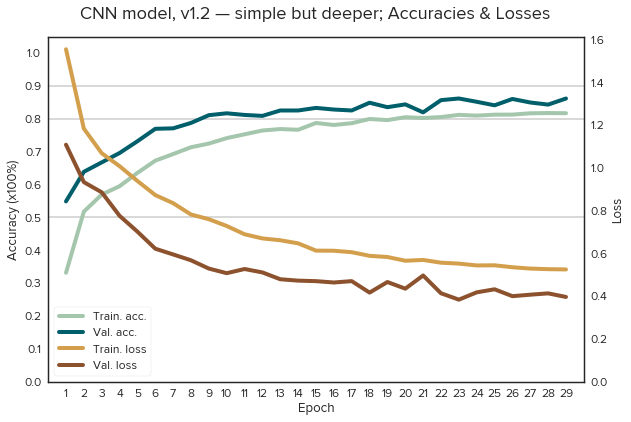

In [398]:
# Plotting the history of the model:
plot_cnn_history(model_name_v1_2, CNN_history_v1_2, 'Images and Plots', leg_loc = 'lower left')

In [394]:
# Function to plot a heatmap of the confusion matrix of the targets and predicted targets of a model:
def confusion_matrix_plot(model_name, y_test, confusion_matrix, encoder, save_folder_path):
    
    # Setting color palette for heatmap:
    cmap = sns.cubehelix_palette(rot = -.4, dark=0.4, light=1, as_cmap=True)
    
    # Getting the classes:
    classes = np.unique(y_test)
    classes = list(encoder.inverse_transform(classes))
    # Instantiating figure and axes object:
    fig, ax = plt.subplots(figsize = (9, 6))
    ax = sns.heatmap(confusion_matrix, vmin = 0, vmax=None, 
                cmap= cmap, center=None, 
                robust=True, annot = True, fmt='d', 
                annot_kws=None, linewidths=0, linecolor='white', 
                cbar=True, cbar_kws=None, cbar_ax=None, square=False, 
                xticklabels = classes, yticklabels = classes)
    
    ax.set_ylabel('Actual Classes', fontsize = 16)
    ax.tick_params(axis = 'y', which = 'both', labelrotation = 0)
    ax.set_xlabel('Predicted Classes', fontsize = 16)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plot_title = model_name + '; Confusion Matrix'
    plt.suptitle(plot_title, fontsize = 18)
    plt.tight_layout(rect = (0, 0, 1, 0.93))
    saving_path = join(save_folder_path, model_name + '_CM') + '.pdf'
    plt.savefig(saving_path)
    print('Plot saved at: {}.'.format(saving_path))
    plt.show();
    return

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Plot saved at: Images and Plots/CNN model, v1.2 — simple but deeper_CM.pdf.


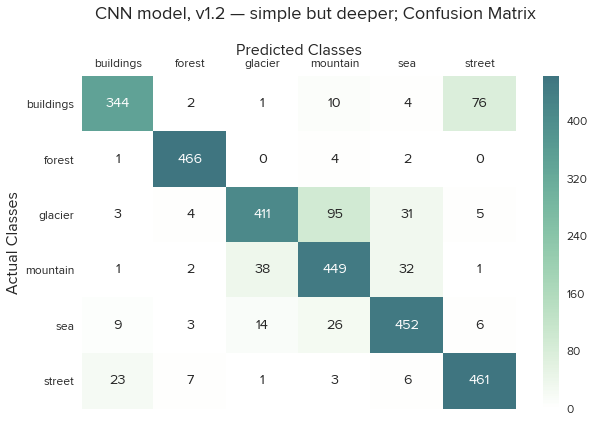

In [399]:
# Plotting the confusion matrix of the model:
confusion_matrix_plot(model_name_v1_2, y_test, confusion_v1_2, encoder, 'Images and Plots')

In [342]:
# Function to plot one image per class with its actual label and the models prediction:
def predictions_plot(model_name, X_test, y_test, y_test_pred_proba, encoder, save_folder_path):
    
    def random_sampling(data, target):
        # Creating an empty list to store the indexes:
        random_item_per_class_index = []

        # Getting the classes from the target array:
        classes = np.unique(target)

        # Looping through the 'target' array to grab one item per class and appending the 
        # indexes to 'random_item_per_class':
        for i in classes:
            temporal_array = np.where(target == i)[0]
            random_choice = np.random.choice(temporal_array, size = 1)[0]
            random_item_per_class_index.append(random_choice)

        return random_item_per_class_index
    
    # Getting one random index per class
    random_index_per_class = random_sampling(X_test, y_test)
    
    # Getting an array only with the datapoints corresponding to the random indices:
    y_probas = y_test_pred_proba[random_index_per_class]
    
    # Getting the maximim probability per datapoint (for the plot)
    y_pred_probas = np.max(y_probas, axis = 1)
    
    # Getting the indices in which the probability is the highest:
    y_pred_labels = np.argmax(y_probas, axis = 1)
    
    # Encoding back the int labels into string labels
    y_pred_labels = encoder.inverse_transform(y_pred_labels)
    
    
    # Creating the figure object:
    fig, ax = plt.subplots(2, 3, figsize = (9, 6)) # , xticks=[], yticks=[]
    ax = ax.ravel()

    # Plotting the 6 classes using the random images found above:
    for i in range(len(random_index_per_class)):
        # Displaying the image of the ith index:
        ax[i].imshow(X_test[random_index_per_class[i]])
        # Labeling each image with the class they belong to:
        subplot_title = encoder.inverse_transform(y_test[random_index_per_class[i]])
        ax[i].set_title(subplot_title)
        ax[i].tick_params(axis = 'both', which = 'both', 
                          bottom=False, left = False, 
                          labelleft = False, labelbottom=False)
        prediction_text = '{}: {:.1f}%'.format(y_pred_labels[i], y_pred_probas[i]*100)
        ax[i].text(0.5, 0.05, prediction_text, transform = ax[i].transAxes, fontsize = 14, 
                   verticalalignment = 'bottom', horizontalalignment = 'center', 
                   bbox = dict(boxstyle = 'round', 
                               facecolor = '#32cd32' if y_pred_labels[i] == subplot_title else '#ff0000', 
                               edgecolor = '#c7c7c7', alpha = 0.8))
        pass
    
    # Setting the plot sup-title:
    plot_title = model_name + '; Predictions'
    plt.suptitle(plot_title, fontsize = 18)
    # Re-arranging margins:
    plt.tight_layout(h_pad = 0.5, w_pad = -5, rect = (0, 0, 1, 0.95))
    # Saving the plot:
    saving_path = join(save_folder_path, model_name + '_pred') + '.pdf'
    plt.savefig(saving_path)
    # Confirmation of saving:
    print('Plot saved at: {}.'.format(saving_path))
    # Showing the plot:
    plt.show();

    return random_index_per_class

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/prepro

Plot saved at: Images and Plots/CNN model, v1.2 — simple but deeper_pred.pdf.


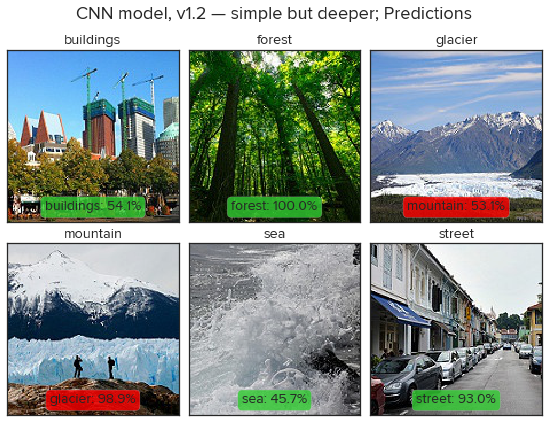

In [400]:
# Plotting a sample of predictions:
rand_idx_v1_2 = predictions_plot(model_name_v1_2, 
                                 X_test_scaled, 
                                 y_test, 
                                 y_test_pred_v1_2_proba, 
                                 encoder, 
                                 'Images and Plots')

In [351]:
# Function to save individual images:
def save_pic(data_set, pic_index, save_folder_path, file_name):
    plt.figure()
    plt.imshow(data_set[pic_index])
    plt.tick_params(axis = 'both', which = 'both', 
                    bottom=False, left = False, 
                    labelleft = False, labelbottom=False)
    saving_path = join(save_folder_path, file_name) + '.pdf'
    plt.savefig(saving_path)
    print('Plot saved at: {}.'.format(saving_path))
    plt.show();
    

Plot saved at: parasites/glacier the drummer.pdf.


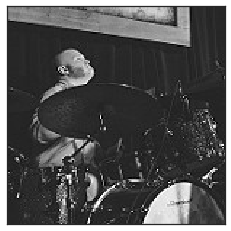

In [352]:
# Saving one "parasite" image found in the dataset:
save_pic(X_test, 1039, 'parasites', 'glacier the drummer')

## The CNN model, v2 — much deeper

In [55]:
model_name_v2 = 'CNN model, v2 — much deeper'

### Building the model

In [56]:
def CNN_model_v2(x_train):
    
    chanDim = -1
    
    CNN_Model = Sequential()

    CNN_Model.add(Conv2D(64, (3, 3), strides = (1, 1), padding = 'same', data_format = 'channels_last', 
                         activation = 'relu', input_shape = X_train[0].shape))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(Conv2D(64, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(MaxPooling2D(3, 3))
    CNN_Model.add(Dropout(0.25))

    CNN_Model.add(Conv2D(128, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(Conv2D(128, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(MaxPooling2D(2, 2))
    CNN_Model.add(Dropout(0.25))

    CNN_Model.add(Conv2D(128, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(Conv2D(128, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    CNN_Model.add(BatchNormalization(axis=chanDim))
    CNN_Model.add(MaxPooling2D(2, 2))
    CNN_Model.add(Dropout(0.25))


    CNN_Model.add(Flatten())
    CNN_Model.add(Dense(72, activation='relu'))
    CNN_Model.add(Dropout(0.4))
    CNN_Model.add(Dense(72, activation='relu'))
    CNN_Model.add(Dropout(0.2))
    CNN_Model.add(Dense(6, activation='softmax'))
    
    # Choosing an optimizer:
    cnn_optimizer = adam()
    
    # Compiling CNN model:
    CNN_Model.compile(loss = 'categorical_crossentropy', 
                  optimizer = cnn_optimizer, 
                  metrics = ['accuracy'])
    
    return CNN_Model

In [57]:
CNN_model_v2 = CNN_model_v2(X_train)

In [58]:
# Getting the network architecture:
CNN_model_v2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 128)       73856     
__________

In [59]:
# Defining the batch size:
batch_size = 32

In [60]:
# Instantiating the data generation engines (flow of images):
train_data_engine = train_data_gen.flow(X_train, y_train_ohe, batch_size = batch_size)
val_data_engine = val_data_gen.flow(X_val, y_val_ohe, batch_size = batch_size)

In [61]:
# Creating an early stop callback:
early_stop_v2 = EarlyStopping(monitor = 'val_loss', 
                                min_delta = 0.0001, 
                                patience = 12, 
                                mode = 'min', 
                                verbose = 1)

In [62]:
#Fitting the model:
CNN_history_v2 = CNN_model_v2.fit_generator(train_data_engine,
                                                steps_per_epoch = (X_train.shape[0] // batch_size) + 1,
                                                epochs = 60, 
                                                validation_data = val_data_engine, 
                                                validation_steps = (X_val.shape[0] // batch_size) + 1,
                                                callbacks = [early_stop_v2], 
                                                use_multiprocessing = True)

Epoch 1/60
394/394 [==============================] - 72s 183ms/step - loss: 1.7750 - acc: 0.2777 - val_loss: 1.5862 - val_acc: 0.3674
Epoch 2/60
394/394 [==============================] - 69s 175ms/step - loss: 1.6207 - acc: 0.3035 - val_loss: 1.5412 - val_acc: 0.4289
Epoch 3/60
394/394 [==============================] - 69s 175ms/step - loss: 1.5510 - acc: 0.3361 - val_loss: 1.6235 - val_acc: 0.4253
Epoch 4/60
394/394 [==============================] - 69s 175ms/step - loss: 1.4746 - acc: 0.3605 - val_loss: 1.4166 - val_acc: 0.3753
Epoch 5/60
394/394 [==============================] - 69s 175ms/step - loss: 1.4328 - acc: 0.3701 - val_loss: 1.1365 - val_acc: 0.5096
Epoch 6/60
394/394 [==============================] - 69s 175ms/step - loss: 1.3863 - acc: 0.3873 - val_loss: 1.5848 - val_acc: 0.3588
Epoch 7/60
394/394 [==============================] - 69s 176ms/step - loss: 1.2958 - acc: 0.4228 - val_loss: 1.0264 - val_acc: 0.5390
Epoch 8/60
394/394 [==============================] - 6

In [65]:
# Saving the model:
CNN_model_v2.save('cnn_models/CNN_model_v2.h5')

### Model evaluation

In this subsection, the trained CNN model will be used to predict the classes of the validation and the test sets. A brief summary of the counts and ratios of the predicted classes will be presented per set, as well as the final results — validation and test accuracy.

Then, a plot showing the accuracies and loss of the model, for both training and validation, as a function of the epoch, will be presented as well.

Later, a plot showing the confusion matrix obtained from the predicted results for the test set will be shown.

Finally, a set of six random images, one per class (real target), will be presented showing what was the models prediciton for that image.

In [365]:
# Using the model to predict classes of validation and test data sets:
y_val_pred_v2_proba = CNN_model_v2.predict(X_val_scaled)
y_val_pred_v2 = np.argmax(y_val_pred_v2_proba, axis = 1)
y_test_pred_v2_proba = CNN_model_v2.predict(X_test_scaled)
y_test_pred_v2 = np.argmax(y_test_pred_v2_proba, axis = 1)

In [67]:
# Getting counts and ratios per class for the validation set:
get_class_ratios(y_val, 'Val. real', y_val_pred_v2, 'Val. pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Val. real (count),Val. real (ratio),Val. pred. (count),Val. pred. (ratio)
0,buildings,219,0.156540,175,0.125089
1,forest,226,0.161544,233,0.166548
2,glacier,239,0.170836,254,0.181558
3,mountain,250,0.178699,188,0.134382
4,sea,227,0.162259,252,0.180129
5,street,238,0.170122,297,0.212294


In [68]:
# Getting counts and ratios per class for the test set:
get_class_ratios(y_test, 'Test real', y_test_pred_v2, 'Test pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Test real (count),Test real (ratio),Test pred. (count),Test pred. (ratio)
0,buildings,437,0.146007,359,0.119947
1,forest,473,0.158035,495,0.165386
2,glacier,549,0.183428,598,0.199800
3,mountain,523,0.174741,358,0.119612
4,sea,510,0.170398,576,0.192449
5,street,501,0.167391,607,0.202807


In [69]:
# Getting the accuracies for the validation and test sets:
accuracy_val_v2 = accuracy_score(y_val, y_val_pred_v2)
accuracy_test_v2 = accuracy_score(y_test, y_test_pred_v2)
print('Validation set accuracy: {:.2f} %'.format(accuracy_val_v2*100))
print('Test set accuracy: {:.2f} %'.format(accuracy_test_v2*100))

Validation set accuracy: 85.42 %
Test set accuracy: 85.00 %


In [70]:
# Creating the confusion matrix:
confusion_v2 = confusion_matrix(y_test, y_test_pred_v2)
print(confusion_v2)

[[342   3   2   2   8  80]
 [  0 470   0   2   1   0]
 [  1   8 461  23  28  28]
 [  2   5 117 324  67   8]
 [  7   3  18   6 466  10]
 [  7   6   0   1   6 481]]


Plot saved at: Images and Plots/CNN model, v2 — much deeper.pdf.


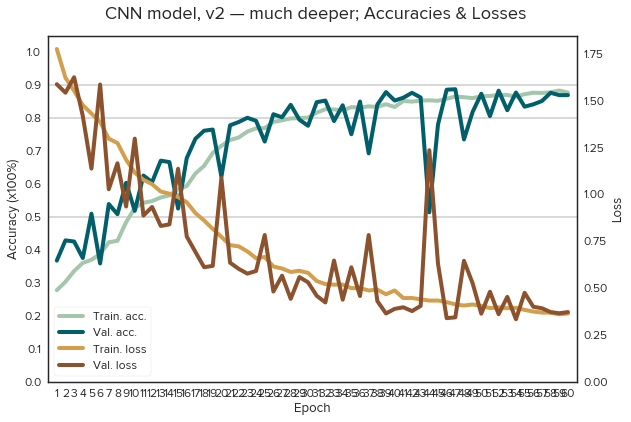

In [401]:
# Plotting the history of the model:
plot_cnn_history(model_name_v2, CNN_history_v2, 'Images and Plots', leg_loc = 'lower left')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Plot saved at: Images and Plots/CNN model, v2 — much deeper_CM.pdf.


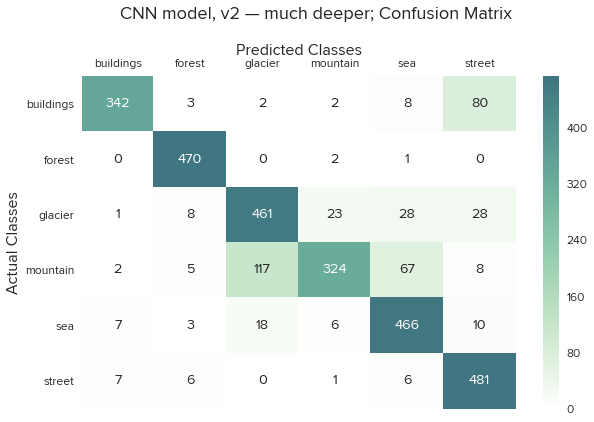

In [403]:
# Plotting the confusion matrix of the model:
confusion_matrix_plot(model_name_v2, y_test, confusion_v2, encoder, 'Images and Plots')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/prepro

Plot saved at: Images and Plots/CNN model, v2 — much deeper_pred.pdf.


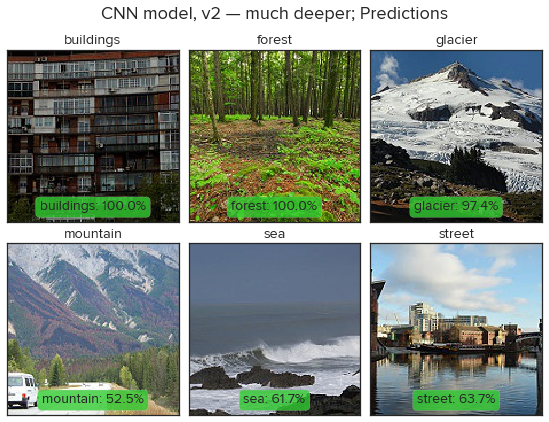

In [404]:
# Plotting a sample of predictions:
rand_idx_v2 = predictions_plot(model_name_v2, 
                                 X_test_scaled, 
                                 y_test, 
                                 y_test_pred_v2_proba, 
                                 encoder, 
                                 'Images and Plots')

## The CNN model, v3 — MobileNet transfer learning 

In [73]:
model_name_v3 = 'CNN model — MobileNet transfer learning'

### Building the model

In [74]:
# Importing the pre-trained MobileNet model and excluding the final layer:
MobileNet_model = MobileNet(weights='imagenet', include_top=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [75]:
# Assign the output of the pre-trained mdoel to a variable:
layer_mid = MobileNet_model.output

# Adding a global pooling layer:
layer_mid = GlobalAveragePooling2D()(layer_mid)

# Adding dense layers with dropput:
layer_mid = Dense(72, activation='relu')(layer_mid)
layer_mid = Dropout(0.4)(layer_mid)
layer_mid = Dense(72, activation='relu')(layer_mid)
layer_mid = Dropout(0.4)(layer_mid)

# Adding the final layer, using "softmax"  for activation and 6 neurons, one per class:
layer_last = Dense(6, activation='softmax')(layer_mid)

# Stacking the pre-trained model and the mid- and last layers created:
CNN_model_v3 = Model(inputs = MobileNet_model.input, outputs = layer_last)

In [76]:
# Getting the list of layers:
for i, layer in enumerate(CNN_model_v3.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [77]:
# Setting which will layers will be trainable and which not:
for layer in CNN_model_v3.layers[:87]:
    layer.trainable = False
    
for layer in CNN_model_v3.layers[87:]:
    layer.trainable = True

In [78]:
CNN_model_v3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [79]:
# Choosing an optimizer:
cnn_optimizer = SGD(lr=0.01, momentum=0.9, nesterov=True)

# Compiling CNN model:
CNN_model_v3.compile(loss = 'categorical_crossentropy', 
                     optimizer = cnn_optimizer, 
                     metrics = ['accuracy'])

In [80]:
# Creating an early stop callback:
early_stop_v3 = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0.0001, 
                              patience = 12, 
                              mode = 'min', 
                              verbose = 1)

In [81]:
# Defining the batch size:
batch_size = 32

### Data augmentation for MobileNet model

The MobileNet model requires its own image data preprocessing. Both generators and engines will be set below.

In [82]:
# Instantiating a data generator:
train_data_gen_mobilenet = ImageDataGenerator(preprocessing_function = pi_mobilenet)

val_data_gen_mobilenet = ImageDataGenerator(preprocessing_function = pi_mobilenet)

In [83]:
# Instantiating the data generation engines (flow of images):
train_data_engine_mobilenet = train_data_gen_mobilenet.flow(X_train, y_train_ohe, batch_size = batch_size)
val_data_engine_mobilenet = val_data_gen_mobilenet.flow(X_val, y_val_ohe, batch_size = batch_size)

### Model fitting

In [84]:
#Fitting the model with the image engine previously created:
CNN_history_v3 = CNN_model_v3.fit_generator(train_data_engine_mobilenet,
                                            steps_per_epoch = (X_train.shape[0] // batch_size) + 1,
                                            epochs = 60, 
                                            validation_data = val_data_engine_mobilenet, 
                                            validation_steps = (X_val.shape[0] // batch_size) + 1,
                                            callbacks = [early_stop_v3], 
                                            use_multiprocessing = True)

Epoch 1/60
394/394 [==============================] - 11s 28ms/step - loss: 0.7322 - acc: 0.7265 - val_loss: 0.3693 - val_acc: 0.8327
Epoch 2/60
394/394 [==============================] - 8s 21ms/step - loss: 0.4909 - acc: 0.8299 - val_loss: 0.4618 - val_acc: 0.8142
Epoch 3/60
394/394 [==============================] - 9s 22ms/step - loss: 0.4416 - acc: 0.8464 - val_loss: 0.4437 - val_acc: 0.7941
Epoch 4/60
394/394 [==============================] - 9s 22ms/step - loss: 0.4059 - acc: 0.8591 - val_loss: 0.4915 - val_acc: 0.8184
Epoch 5/60
394/394 [==============================] - 9s 22ms/step - loss: 0.3859 - acc: 0.8687 - val_loss: 0.4737 - val_acc: 0.8106
Epoch 6/60
394/394 [==============================] - 8s 21ms/step - loss: 0.3732 - acc: 0.8730 - val_loss: 0.4338 - val_acc: 0.8184
Epoch 7/60
394/394 [==============================] - 8s 21ms/step - loss: 0.3599 - acc: 0.8760 - val_loss: 0.5151 - val_acc: 0.7877
Epoch 8/60
394/394 [==============================] - 8s 21ms/step -

In [85]:
# Saving the model
CNN_model_v3.save('cnn_models/CNN_model_v3.h5')

### Model evaluation

In this subsection, the trained CNN model will be used to predict the classes of the validation and the test sets. A brief summary of the counts and ratios of the predicted classes will be presented per set, as well as the final results — validation and test accuracy.

Then, a plot showing the accuracies and loss of the model, for both training and validation, as a function of the epoch, will be presented as well.

Later, a plot showing the confusion matrix obtained from the predicted results for the test set will be shown.

Finally, a set of six random images, one per class (real target), will be presented showing what was the models prediciton for that image.

In [86]:
# Instantiating an image generator for the test set to be used for prediction:
test_data_gen_mobilenet = ImageDataGenerator(preprocessing_function = pi_mobilenet)

In [87]:
# Generating the image engines for both validation and test sets:
val_data_engine_mobilenet_pred = val_data_gen_mobilenet.flow(X_val, y_val, 
                                                             shuffle = False, 
                                                             batch_size = batch_size)
test_data_engine_mobilenet = test_data_gen_mobilenet.flow(X_test, y_test, 
                                                          shuffle = False, 
                                                          batch_size = batch_size)

## Note: 'shuffle' must be False so indices of predicted correspond to those of "actual" data.

In [369]:
# Using the models 'predict_generator' to generate predictions from the engines above:
y_val_pred_v3_proba = CNN_model_v3.predict_generator(val_data_engine_mobilenet_pred, 
                                                 steps = (X_val.shape[0] // batch_size) + 1)
y_test_pred_v3_proba = CNN_model_v3.predict_generator(test_data_engine_mobilenet, 
                                                 steps = (X_test.shape[0] // batch_size) + 1)

In [370]:
# Transforming prediction to label-encoded one-dimensional array:
y_val_pred_v3 = np.argmax(y_val_pred_v3_proba, axis = 1)
y_test_pred_v3 = np.argmax(y_test_pred_v3_proba, axis = 1)

## Note: Predictions are in probabilities matrix of M x #classes, each column with the probablity per class

In [356]:
# Getting counts and ratios per class for the validation set:
get_class_ratios(y_val, 'Val. real', y_val_pred_v3, 'Val. pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Val. real (count),Val. real (ratio),Val. pred. (count),Val. pred. (ratio)
0,buildings,219,0.156540,162,0.115797
1,forest,226,0.161544,229,0.163688
2,glacier,239,0.170836,122,0.087205
3,mountain,250,0.178699,404,0.288778
4,sea,227,0.162259,191,0.136526
5,street,238,0.170122,291,0.208006


In [91]:
# Getting counts and ratios per class for the test set:
get_class_ratios(y_test, 'Test real', y_test_pred_v3, 'Test pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Test real (count),Test real (ratio),Test pred. (count),Test pred. (ratio)
0,buildings,437,0.146007,312,0.104243
1,forest,473,0.158035,475,0.158704
2,glacier,549,0.183428,322,0.107584
3,mountain,523,0.174741,831,0.277648
4,sea,510,0.170398,431,0.144003
5,street,501,0.167391,622,0.207818


In [92]:
# Getting counts and ratios per class for the test set:
accuracy_val_v3 = accuracy_score(y_val, y_val_pred_v3)
accuracy_test_v3 = accuracy_score(y_test, y_test_pred_v3)
print('Validation set accuracy: {:.2f} %'.format(accuracy_val_v3*100))
print('Test set accuracy: {:.2f} %'.format(accuracy_test_v3*100))

Validation set accuracy: 82.56 %
Test set accuracy: 83.23 %


In [93]:
# Creating the confusion matrix:
confusion_v3 = confusion_matrix(y_test, y_test_pred_v3)
print(confusion_v3)

[[308   1   0   8   0 120]
 [  0 466   0   7   0   0]
 [  0   3 296 239   8   3]
 [  0   0  15 506   0   2]
 [  3   2  11  68 422   4]
 [  1   3   0   3   1 493]]


Plot saved at: Images and Plots/CNN model — MobileNet transfer learning.pdf.


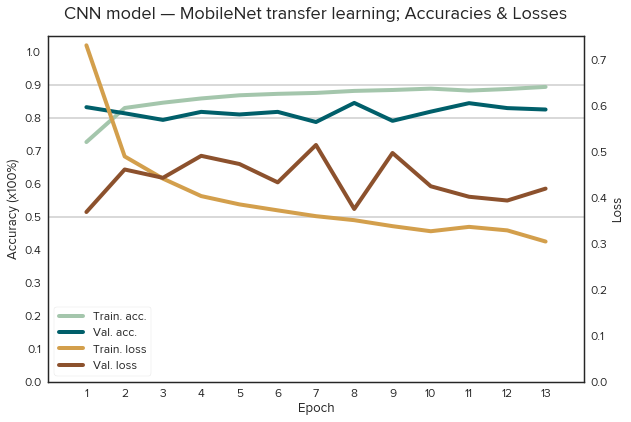

In [405]:
# Plotting the history of the model:
plot_cnn_history(model_name_v3, CNN_history_v3, 'Images and Plots', leg_loc = 'lower left')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Plot saved at: Images and Plots/CNN model — MobileNet transfer learning_CM.pdf.


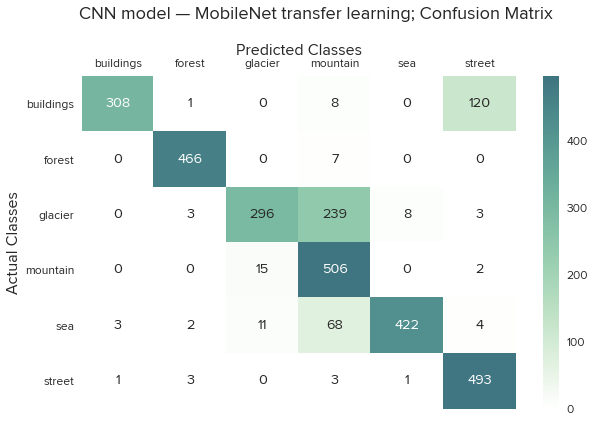

In [406]:
# Plotting the confusion matrix of the model:
confusion_matrix_plot(model_name_v3, y_test, confusion_v3, encoder, 'Images and Plots')

In [407]:
# Function to plot one image per class with its actual label and the models prediction using a generator:
def predictions_plot_generator(model_name, X_test, y_test, CNN_model, image_generator, encoder, save_folder_path):
    '''
    Function:
    
    Note: This function is similar to 'predictions_plot()' but it is made to be used with a image engine,
    which is activated with the 'image_generator' passed in.
    
    '''
    
    def random_sampling(data, target):
        # Creating an empty list to store the indexes:
        random_item_per_class_index = []

        # Getting the classes from the target array:
        classes = np.unique(target)

        # Looping through the 'target' array to grab one item per class and appending the 
        # indexes to 'random_item_per_class':
        for i in classes:
            temporal_array = np.where(target == i)[0]
            random_choice = np.random.choice(temporal_array, size = 1)[0]
            random_item_per_class_index.append(random_choice)

        return random_item_per_class_index
    
    # Getting one random index per class
    random_index_per_class = random_sampling(X_test, y_test)
    
    # Instantiating the image engine only for the datapoints belonging to the random indices:
    data_engine = image_generator.flow(X_test[random_index_per_class],
                                                      y_test[random_index_per_class],  
                                                      shuffle = False, 
                                                      batch_size = len(random_index_per_class))
    
    # Getting a matrix of probabilities per class per datapoint:
    y_probas = CNN_model.predict_generator(data_engine, steps = 1)
    
    # Getting the maximim probability per datapoint (for the plot)
    y_pred_probas = np.max(y_probas, axis = 1)
    
    # Getting the indices in which the probability is the highest:
    y_pred_labels = np.argmax(y_probas, axis = 1)
    
    # Encoding back the int labels into string labels
    y_pred_labels = encoder.inverse_transform(y_pred_labels)
    
    
    # Creating the figure object:
    fig, ax = plt.subplots(2, 3, figsize = (9, 6)) # , xticks=[], yticks=[]
    ax = ax.ravel()

    # Plotting the 6 classes using the random images found above:
    for i in range(len(random_index_per_class)):
        # Displaying the image of the ith index:
        ax[i].imshow(X_test[random_index_per_class[i]])
        # Labeling each image with the class they belong to:
        subplot_title = encoder.inverse_transform(y_test[random_index_per_class[i]])
        ax[i].set_title(subplot_title)
        ax[i].tick_params(axis = 'both', which = 'both', 
                          bottom=False, left = False, 
                          labelleft = False, labelbottom=False)
        prediction_text = '{}: {:.1f}%'.format(y_pred_labels[i], y_pred_probas[i]*100)
        ax[i].text(0.5, 0.05, prediction_text, transform = ax[i].transAxes, fontsize = 14, 
                   verticalalignment = 'bottom', horizontalalignment = 'center', 
                   bbox = dict(boxstyle = 'round', 
                               facecolor = '#32cd32' if y_pred_labels[i] == subplot_title else '#ff0000', 
                               edgecolor = '#c7c7c7', alpha = 0.8))
        pass
    
    # Setting the plot sup-title:
    plot_title = model_name + '; Predictions'
    plt.suptitle(plot_title, fontsize = 18)
    # Re-arranging margins:
    plt.tight_layout(h_pad = 0.5, w_pad = -5, rect = (0, 0, 1, 0.95))
    # Saving the plot:
    saving_path = join(save_folder_path, model_name + '_pred') + '.pdf'
    plt.savefig(saving_path)
    # Confirmation of saving:
    print('Plot saved at: {}.'.format(saving_path))
    # Showing the plot:
    plt.show();

    return random_index_per_class

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/prepro

Plot saved at: Images and Plots/CNN model — MobileNet transfer learning_pred.pdf.


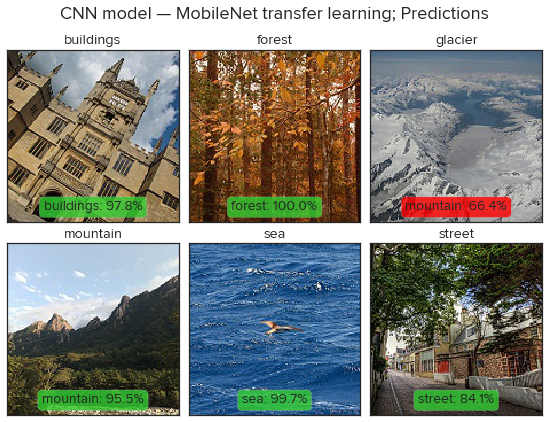

In [432]:
# Plotting a sample of predictions:
rand_idx_v3 = predictions_plot_generator(model_name_v3, 
                                         X_test, 
                                         y_test,
                                         CNN_model_v3, 
                                         test_data_gen_mobilenet, 
                                         encoder, 
                                         'Images and Plots')

## The CNN model, v4 — VGG16 transfer learning

In [96]:
model_name_v4 = 'CNN model — VGG16 transfer learning'

### Building the model

In [97]:
# Importing the pre-trained VGG16 model and excluding the final layers:
VGG16_model = vgg16.VGG16(weights='imagenet', include_top=False)

In [98]:
# Assigning the output of the pre-trained model to a variable:
layer_mid = VGG16_model.output

# Adding a global pooling layer:
layer_mid = GlobalAveragePooling2D()(layer_mid)

# Adding dense layers with dropput:
layer_mid = Dense(72, activation='relu')(layer_mid)
layer_mid = Dropout(0.4)(layer_mid)
layer_mid = Dense(72, activation='relu')(layer_mid)
layer_mid = Dropout(0.4)(layer_mid)

# Adding the final layer, using "softmax"  for activation and 6 neurons, one per class:
layer_last = Dense(6, activation='softmax')(layer_mid)

# Stacking the pre-trained model and the mid- and last layers created:
CNN_model_v4 = Model(inputs = VGG16_model.input, outputs = layer_last)

In [99]:
# Getting the list of layers:
for i, layer in enumerate(CNN_model_v4.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_2
20 dense_12
21 dropout_14
22 dense_13
23 dropout_15
24 dense_14


In [100]:
# Setting which will layers will be trainable and which not:
for layer in CNN_model_v4.layers[:19]:
    layer.trainable = False
    
for layer in CNN_model_v4.layers[19:]:
    layer.trainable = True

In [101]:
CNN_model_v4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [102]:
# Choosing an optimizer:
cnn_optimizer = adam()

# Compiling CNN model:
CNN_model_v4.compile(loss = 'categorical_crossentropy', 
                     optimizer = cnn_optimizer, 
                     metrics = ['accuracy'])

In [103]:
# Creating an early stop callback:
early_stop_v4 = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0.0001, 
                              patience = 12, 
                              mode = 'min', 
                              verbose = 1)

In [104]:
# Defining the batch size:
batch_size = 32

### Data augmentation for VGG16 model

The VGG16 model requires its own image data preprocessing. Both generators and engines will be set below.

In [105]:
# Instantiating a data generator:
train_data_gen_vgg16 = ImageDataGenerator(preprocessing_function = pi_vgg16)

val_data_gen_vgg16 = ImageDataGenerator(preprocessing_function = pi_vgg16)

In [106]:
# Instantiating the data generation engines (flow of images):
train_data_engine_vgg16 = train_data_gen_vgg16.flow(X_train, y_train_ohe, batch_size = batch_size)
val_data_engine_vgg16 = val_data_gen_vgg16.flow(X_val, y_val_ohe, batch_size = batch_size)

### Model fitting

In [107]:
# Fitting the model:
CNN_history_v4 = CNN_model_v4.fit_generator(train_data_engine_vgg16,
                                            steps_per_epoch = (X_train.shape[0] // batch_size) + 1,
                                            epochs = 60, 
                                            validation_data = val_data_engine_vgg16, 
                                            validation_steps = (X_val.shape[0] // batch_size) + 1,
                                            callbacks = [early_stop_v3], 
                                            use_multiprocessing = True)

Epoch 1/60
394/394 [==============================] - 17s 43ms/step - loss: 1.1093 - acc: 0.6957 - val_loss: 0.3472 - val_acc: 0.8842
Epoch 2/60
394/394 [==============================] - 14s 37ms/step - loss: 0.4605 - acc: 0.8396 - val_loss: 0.3030 - val_acc: 0.8878
Epoch 3/60
394/394 [==============================] - 14s 35ms/step - loss: 0.3638 - acc: 0.8738 - val_loss: 0.2833 - val_acc: 0.9028
Epoch 4/60
394/394 [==============================] - 14s 35ms/step - loss: 0.3277 - acc: 0.8891 - val_loss: 0.2740 - val_acc: 0.9006
Epoch 5/60
394/394 [==============================] - 14s 35ms/step - loss: 0.3068 - acc: 0.8972 - val_loss: 0.2576 - val_acc: 0.9071
Epoch 6/60
394/394 [==============================] - 14s 36ms/step - loss: 0.2789 - acc: 0.9080 - val_loss: 0.2597 - val_acc: 0.9149
Epoch 7/60
394/394 [==============================] - 14s 36ms/step - loss: 0.2647 - acc: 0.9087 - val_loss: 0.2534 - val_acc: 0.9078
Epoch 8/60
394/394 [==============================] - 14s 35ms

In [108]:
# Saving the model:
CNN_model_v4.save('cnn_models/CNN_model_v4.h5')

### Model evaluation

In this subsection, the trained CNN model will be used to predict the classes of the validation and the test sets. A brief summary of the counts and ratios of the predicted classes will be presented per set, as well as the final results — validation and test accuracy.

Then, a plot showing the accuracies and loss of the model, for both training and validation, as a function of the epoch, will be presented as well.

Later, a plot showing the confusion matrix obtained from the predicted results for the test set will be shown.

Finally, a set of six random images, one per class (real target), will be presented showing what was the models prediciton for that image.

In [423]:
# Instantiating an image generator for the test set to be used for prediction:
test_data_gen_vgg16 = ImageDataGenerator(preprocessing_function = pi_vgg16)

In [424]:
# Generating the image engines for both validation and test sets:
val_data_engine_vgg16_pred = val_data_gen_vgg16.flow(X_val, y_val, shuffle = False, batch_size = batch_size)
test_data_engine_vgg16 = test_data_gen_vgg16.flow(X_test, y_test, shuffle = False, batch_size = batch_size)

## Note: 'shuffle' must be False so indices of predicted correspond to those of "actual" data.

In [425]:
# Using the models 'predict_generator' to generate predictions from the engines above:
y_val_pred_v4_proba = CNN_model_v4.predict_generator(val_data_engine_vgg16_pred, 
                                                 steps = (X_val.shape[0] // batch_size) + 1)
y_test_pred_v4_proba = CNN_model_v4.predict_generator(test_data_engine_vgg16, 
                                                 steps = (X_test.shape[0] // batch_size) + 1)

In [426]:
# Transforming prediction to label-encoded one-dimensional array:
y_val_pred_v4 = np.argmax(y_val_pred_v4_proba, axis = 1)
y_test_pred_v4 = np.argmax(y_test_pred_v4_proba, axis = 1)

## Note: Predictions are in probabilities matrix of M x #classes, each column with the probablity per class

In [113]:
# Getting counts and ratios per class for the validation set:
get_class_ratios(y_val, 'Val. real', y_val_pred_v4, 'Val. pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Val. real (count),Val. real (ratio),Val. pred. (count),Val. pred. (ratio)
0,buildings,219,0.156540,205,0.146533
1,forest,226,0.161544,228,0.162974
2,glacier,239,0.170836,220,0.157255
3,mountain,250,0.178699,266,0.190136
4,sea,227,0.162259,230,0.164403
5,street,238,0.170122,250,0.178699


In [114]:
# Getting counts and ratios per class for the test set:
get_class_ratios(y_test, 'Test real', y_test_pred_v4, 'Test pred.', is_encoded = True, encoder = encoder)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Class labels,Test real (count),Test real (ratio),Test pred. (count),Test pred. (ratio)
0,buildings,437,0.146007,402,0.134313
1,forest,473,0.158035,485,0.162045
2,glacier,549,0.183428,500,0.167056
3,mountain,523,0.174741,551,0.184096
4,sea,510,0.170398,519,0.173405
5,street,501,0.167391,536,0.179085


In [427]:
# Getting the accuracies for the validation and test sets:
accuracy_val_v4 = accuracy_score(y_val, y_val_pred_v4)
accuracy_test_v4 = accuracy_score(y_test, y_test_pred_v4)
print('Validation set accuracy: {:.2f} %'.format(accuracy_val_v4*100))
print('Test set accuracy: {:.2f} %'.format(accuracy_test_v4*100))

Validation set accuracy: 90.92 %
Test set accuracy: 90.75 %


In [116]:
# Creating the confusion matrix:
confusion_v4 = confusion_matrix(y_test, y_test_pred_v4)
print(confusion_v4)

[[376   1   0   1   2  57]
 [  0 472   1   0   0   0]
 [  2   5 441  83  18   0]
 [  1   3  50 461   7   1]
 [  2   3   8   5 490   2]
 [ 21   1   0   1   2 476]]


Plot saved at: Images and Plots/CNN model — VGG16 transfer learning.pdf.


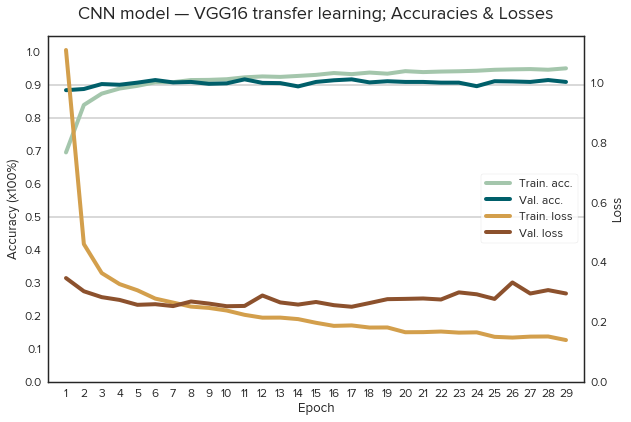

In [410]:
# Plotting the history of the model:
plot_cnn_history(model_name_v4, CNN_history_v4, 'Images and Plots', leg_loc = 'center right')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Plot saved at: Images and Plots/CNN model — VGG16 transfer learning_CM.pdf.


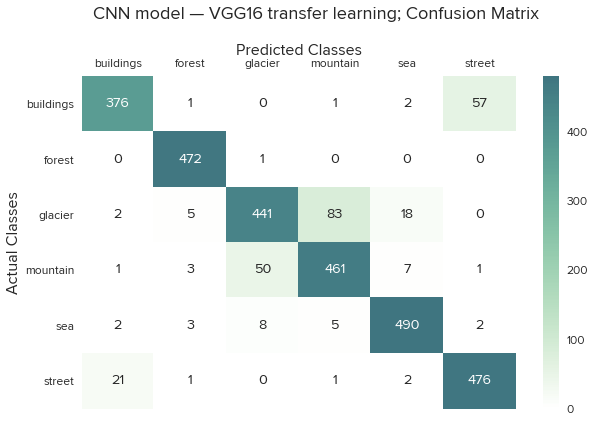

In [409]:
# Plotting the confusion matrix of the model:
confusion_matrix_plot(model_name_v4, y_test, confusion_v4, encoder, 'Images and Plots')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/prepro

Plot saved at: Images and Plots/CNN model — VGG16 transfer learning_pred.pdf.


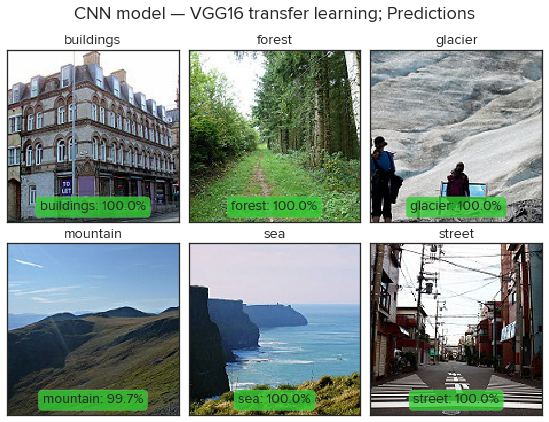

In [434]:
# Plotting a sample of predictions:
rand_idx_v4 = predictions_plot_generator(model_name_v4, 
                                         X_test, 
                                         y_test,
                                         CNN_model_v4, 
                                         test_data_gen_vgg16, 
                                         encoder, 
                                         'Images and Plots')

In [118]:
# Killing caffeinate:
try:
    _caf.kill()
except:
    print('No Caffeinate subprocess found. If processes for this PID exist,\nthey will be closed by restarting the kernel.')
else:
    print('Caffeinate for this noteboook killed.')

No Caffeinate subprocess found. If processes for this PID exist,
they will be closed by restarting the kernel.


**End of Notebook.**

---

© Raul A. Morales Delgado, 2019. This material and all related content to this Capstone Project is the proprietary intellectual property of Raul A. Morales Delgado.